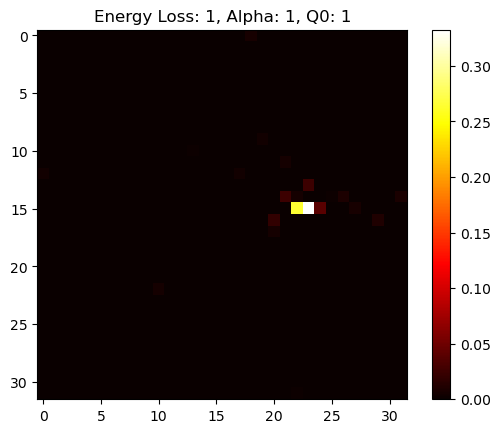

In [4]:
# 🧪 ML-JET: Local Testing Notebook
# Author: Your Name

import os
import torch
import matplotlib.pyplot as plt

from data.loader_torch import load_split_from_csv, JetDataset

# ✅ Configuration
root_dir = "/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/data/jet_ml_benchmark_config_01_to_09_alpha_0.2_0.3_0.4_q0_1.5_2.0_2.5_MMAT_MLBT_size_1000_balanced_unshuffled"
global_max = 121.79151153564453
train_file = os.path.join(root_dir, "train_files.csv")

# ✅ Load file-label list
train_list = load_split_from_csv(train_file, root_dir)

# ✅ Subset to test quickly
train_subset = train_list[:16]  # Load small batch

# ✅ Build Dataset
train_dataset = JetDataset(train_subset, global_max=global_max)

# ✅ Fetch sample
img, labels = train_dataset[0]

# ✅ Display Image
plt.imshow(img.squeeze(0), cmap='hot')
plt.title(f"Energy Loss: {labels['energy_loss_output'].item()}, "
          f"Alpha: {labels['alpha_output'].item()}, "
          f"Q0: {labels['q0_output'].item()}")
plt.colorbar()
plt.show()


In [ ]:
import torch
from models.model_torch import create_model

# ✅ Choose backbone: 'efficientnet', 'convnext', 'swin', or 'mamba'
# backbone = 'efficientnet'
# backbone = 'convnext'
# backbone = 'swin'
backbone = 'mamba'

# ✅ Create model and optimizer
model, optimizer = create_model(backbone=backbone, input_shape=(1, 32, 32), learning_rate=1e-4)

# ✅ Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Print model summary
print(model)